##Configurações

In [1]:
!pip install scikeras==0.12.0
!pip install keras==2.15.0
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Metodos Para Calcular o Theils U Coefficient
def division(measure, previousI):
  return measure / previousI

def power(measure):
  return np.power(measure, 2)

def summation(measure):
  return np.sum(measure)

def mean(N, measure):
  return (1/N) * measure

def sqrt(measure):
  return np.sqrt(measure)

def theil_u2(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    N = len(y_true)

    subtractionNumerator = y_pred[1:] - y_true[1:]
    divisionNumerator = division(subtractionNumerator, y_true[:-1])
    powerNumerator = power(divisionNumerator)
    summationNumerator = summation(powerNumerator)
    meanNumerator = mean(N, summationNumerator)
    numerator = sqrt(meanNumerator)

    subtractionDenominator = y_true[1:] - y_true[:-1]
    powerDenominator = power(division(subtractionDenominator, y_true[:-1]))
    denominator = sqrt(mean(N, summation(powerDenominator)))

    theilU2 = numerator / denominator

    return theilU2

## Grafico

In [5]:
dataset = pd.read_csv('/content/drive/My Drive/Projeto Internações/Preparação dos dados/dataset_internacoes_completo.csv')

In [6]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0
2,48,2010-01-01,AC,BRASILÉIA,22325.0
3,2,2010-01-01,AC,BUJARI,8838.0
4,4,2010-01-01,AC,CAPIXABA,9179.0
...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0


In [7]:
dataset['populacao'].dtype

dtype('float64')

In [8]:
def porte(populacao):
  if populacao <= 20000:
    return 'Pequeno Porte I'
  elif populacao >= 20001 and populacao <= 50000 :
    return 'Pequeno Porte II'
  elif populacao >= 50001 and populacao <= 100000:
    return 'Médio Porte'
  elif populacao >= 100001 and populacao <= 900000:
    return 'Grande Porte'
  elif populacao >= 900001:
    return 'Metrópole'

In [9]:
def taxa_internacao (row):
  return row['Qtd. internacoes']*1000/row['populacao']

In [10]:
dataset['taxa_internacao'] = dataset.apply(taxa_internacao, axis =1)

In [11]:
dataset['Porte'] = dataset['populacao'].apply(porte)

In [12]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,taxa_internacao,Porte
0,14,2010-01-01,AC,ACRELÂNDIA,13081.0,1.070255,Pequeno Porte I
1,7,2010-01-01,AC,ASSIS BRASIL,6335.0,1.104972,Pequeno Porte I
2,48,2010-01-01,AC,BRASILÉIA,22325.0,2.150056,Pequeno Porte II
3,2,2010-01-01,AC,BUJARI,8838.0,0.226296,Pequeno Porte I
4,4,2010-01-01,AC,CAPIXABA,9179.0,0.435777,Pequeno Porte I
...,...,...,...,...,...,...,...
1024875,28,2024-04-01,TO,TOCANTINÓPOLIS,23102.0,1.212016,Pequeno Porte II
1024876,1,2024-04-01,TO,TUPIRAMA,1608.0,0.621891,Pequeno Porte I
1024877,1,2024-04-01,TO,TUPIRATINS,2142.0,0.466853,Pequeno Porte I
1024878,12,2024-04-01,TO,WANDERLÂNDIA,11216.0,1.069900,Pequeno Porte I


Filtro

In [13]:
dataset = dataset[dataset['Porte'] == 'Médio Porte']

In [14]:
dataset

,Qtd. internacoes,Data completa,UF,Município,populacao,taxa_internacao,Porte
5,249,2010-01-01,AC,CRUZEIRO DO SUL,81907.0,3.040033,Médio Porte
36,54,2010-01-01,AL,CAMPO ALEGRE,52041.0,1.037643,Médio Porte
45,55,2010-01-01,AL,CORURIPE,53387.0,1.030213,Médio Porte
88,64,2010-01-01,AL,PALMEIRA DOS ÍNDIOS,72064.0,0.888099,Médio Porte
94,138,2010-01-01,AL,PENEDO,61834.0,2.231782,Médio Porte
...,...,...,...,...,...,...,...
1024719,133,2024-04-01,SP,UBATUBA,80781.0,1.646427,Médio Porte
1024734,59,2024-04-01,SP,VINHEDO,65209.0,0.904783,Médio Porte
1024739,69,2024-04-01,SP,VOTUPORANGA,86820.0,0.794748,Médio Porte
1024799,75,2024-04-01,TO,GURUPI,78394.0,0.956706,Médio Porte


In [15]:
time_series = dataset[['Data completa', 'taxa_internacao']]
time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])

<ipython-input-15-8980fe5bf9f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Data completa'] = pd.to_datetime(time_series['Data completa'])


In [16]:
time_series = time_series.set_index('Data completa').resample('M').mean()

In [17]:
time_series

,taxa_internacao
Data completa,
2010-01-31,1.262302
2010-02-28,1.205797
2010-03-31,1.276683
2010-04-30,1.215884
2010-05-31,1.215052
...,...
2023-12-31,0.890539
2024-01-31,0.890174
2024-02-29,0.848012


In [18]:
time_series = time_series['2010-1-1':'2024-04-30']

In [19]:
previsao_2010 = pd.read_csv('/content/drive/My Drive/Projeto Internações/Resultados LSTM/predicao_previne_brasil_medio_porte_sem_dados_inputados(2010).csv')
previsao_2012 = pd.read_csv('/content/drive/My Drive/Projeto Internações/Resultados LSTM/predicao_previne_brasil_medio_porte_sem_dados_inputados(2012).csv')
previsao_2014 = pd.read_csv('/content/drive/My Drive/Projeto Internações/Resultados LSTM/predicao_previne_brasil_medio_porte_sem_dados_inputados(2014).csv')
previsao_2016 = pd.read_csv('/content/drive/My Drive/Projeto Internações/Resultados LSTM/predicao_previne_brasil_medio_porte_sem_dados_inputados(2016).csv')

In [20]:
previsao_2010

,previsao,valor_real
0,0.741617,0.806979
1,0.757427,0.738610
2,0.750600,0.846133
3,0.767388,0.867756
4,0.806639,0.917178
5,0.848829,0.911903
6,0.867200,0.917154
7,0.864260,0.939364
8,0.864526,0.908139
9,0.863329,0.906842


In [21]:
dates = pd.date_range(start='2022-01-01', periods=len(previsao_2010), freq='M')

# Adicione essas datas como índice ao DataFrame
previsao_2010.index = dates

# Verifique o DataFrame
print(previsao_2010)

            previsao  valor_real
2022-01-31  0.741617    0.806979
2022-02-28  0.757427    0.738610
2022-03-31  0.750600    0.846133
2022-04-30  0.767388    0.867756
2022-05-31  0.806639    0.917178
2022-06-30  0.848829    0.911903
2022-07-31  0.867200    0.917154
2022-08-31  0.864260    0.939364
2022-09-30  0.864526    0.908139
2022-10-31  0.863329    0.906842
2022-11-30  0.860759    0.887028
2022-12-31  0.853995    0.870371
2023-01-31  0.843671    0.877790
2023-02-28  0.839563    0.857721
2023-03-31  0.837294    0.924976
2023-04-30  0.855203    0.931383
2023-05-31  0.879871    0.992631
2023-06-30  0.909262    0.975985
2023-07-31  0.922941    0.989791
2023-08-31  0.923651    0.963418
2023-09-30  0.913322    0.922492
2023-10-31  0.892539    0.923246
2023-11-30  0.878108    0.921506
2023-12-31  0.877889    0.890539
2024-01-31  0.874917    0.890174
2024-02-29  0.867019    0.848012
2024-03-31  0.847087    0.911118
2024-04-30  0.849384    0.839982


In [22]:
previsao_2012.index = dates
previsao_2014.index = dates
previsao_2016.index = dates

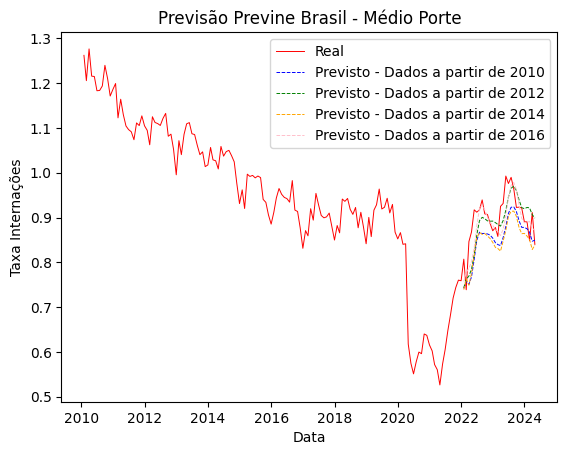

In [23]:
plt.plot(time_series, color='red', linewidth=0.7, label = 'Real')
plt.plot(previsao_2010['previsao'], color='blue', linestyle='--', linewidth=0.7, label = 'Previsto - Dados a partir de 2010')
plt.plot(previsao_2012['previsao'], color='green', linestyle='--', linewidth=0.7, label = 'Previsto - Dados a partir de 2012')
plt.plot(previsao_2014['previsao'], color='orange', linestyle='--', linewidth=0.7, label = 'Previsto - Dados a partir de 2014')
plt.plot(previsao_2016['previsao'], color='pink', linestyle='--', linewidth=0.7, label = 'Previsto - Dados a partir de 2016')
plt.title('Previsão Previne Brasil - Médio Porte')
plt.ylabel('Taxa Internações')
plt.xlabel('Data')
plt.legend()
plt.show()